In [ ]:
from helpers.readSetFiles import readSetFiles,validateParameters,readNumberSetFiles
from graph import plotEpochsError,plotGraphEj1,plotGraphEj1Animated,plotErrorAgainstKGraph,plotErrorAgainstTrainingPercentageGraph,plotMetricsAgainstVariable,plotMetricAgainstVariable,plotProbabilityTestingError
from helpers.configHelper import ConfigHelper
from neuralNetworkManager import NeuralNetworkManager
from activationFunctions.stepActivationFunction import StepActivationFunction
from activationFunctions.linealActivationFunction import LinealActivationFunction
from activationFunctions.hyperbolicTangentActivationFunction import HyperbolicTangentActivationFunction
from activationFunctions.sigmoidalActivationFunction import SigmoidalActivationFunction
from helpers.noise import createTrainingSetWithNoise
from app import normalize
from output import Output
from metrics import Metrics
import copy
import numpy as np
import random

# Ej1 - Perceptron Simple Escalon

##### Funcion logica ’Y’ con entradas

In [ ]:
configPath="./config/Ej1/configEj1.json"
configHelper = ConfigHelper(configPath)
(architecture,activationFunction,beta,learningRate,maxEpochs,maxToleranceExponent,randomSeed) = configHelper.getProperties()
(trainingSet,resultsSet)=readSetFiles("./datasets/Ej1/training_set_ej_1.txt","./datasets/Ej1/result_set_ej_1_and.txt")

#Seteo de seed
np.random.seed(randomSeed)
random.seed(randomSeed)

neuralNetworkManager = NeuralNetworkManager(architecture,activationFunction,learningRate,maxEpochs,maxToleranceExponent)
(epochs,executionTime,exception) = neuralNetworkManager.start(trainingSet,resultsSet)
#Plot error graph
plotEpochsError(epochs)
#Plot points and division graph
isXOR = False
plotGraphEj1(trainingSet,isXOR,epochs)
##Crear la carpeta de resultados con la subcarpeta de graficos y estadisticas en caso de que no existan
isEj1 = True
plotGraphEj1Animated(trainingSet,isXOR,epochs,isEj1)
#Print output
print("FINISH-------------------------------------------------------------------------------------------")
output = Output(configHelper,epochs[-1].error,epochs[-1].epochNumber,executionTime)
output.printOutput()

##### Funcion logica ’O exclusivo’ con entradas

In [ ]:
configPath="./config/Ej1/configEj1.json"
configHelper = ConfigHelper(configPath)
(architecture,activationFunction,beta,learningRate,maxEpochs,maxToleranceExponent,randomSeed) = configHelper.getProperties()
(trainingSet,resultsSet)=readSetFiles("./datasets/Ej1/training_set_ej_1.txt","./datasets/Ej1/result_set_ej_1_and.txt")

#Seteo de seed
np.random.seed(randomSeed)
random.seed(randomSeed)


neuralNetworkManager = NeuralNetworkManager(architecture,activationFunction,learningRate,maxEpochs,maxToleranceExponent)
(epochs,executionTime,exception) = neuralNetworkManager.start(trainingSet,resultsSet)
#Plot error graph
plotEpochsError(epochs)
#Plot points and division graph
isXOR = True
plotGraphEj1(trainingSet,isXOR,epochs)
isEj1 = True
plotGraphEj1Animated(trainingSet,isXOR,epochs,isEj1)
#Print output
print("FINISH-------------------------------------------------------------------------------------------")
output = Output(configHelper,epochs[-1].error,epochs[-1].epochNumber,executionTime)
output.printOutput()

# Ej2 Perceptron Simple lineal/no lineal


In [30]:
configHelper = ConfigHelper("./config/Ej2/configEj2.json")
(architecture,activationFunction,beta,learningRate,maxEpochs,maxToleranceExponent,randomSeed) = configHelper.getProperties()
(trainingSet,resultsSet)=readSetFiles("./datasets/Ej2/training_set_ej_2.txt","./datasets/Ej2/result_set_ej_2.txt")

#Seteo de seed
np.random.seed(randomSeed)
random.seed(randomSeed)

In [ ]:
(resultsSetNormalized,fixnt)=normalize(resultsSet,0,1)

###### Para tanh

In [ ]:
(resultsSetNormalized,fixnt)=normalize(resultsSet,-1,1)

###### Para lineal

In [ ]:
resultsSetNormalized = resultsSet
fixnt = None

##### Rutina

In [ ]:
#Divido el conjunto tomando los primeros 160 (arbitrario)

subTrainingSet = trainingSet[0:159]
subTestingSet = trainingSet[160:-1]

subResultSet = resultsSetNormalized[0:159]
subResultTestingSet = resultsSetNormalized[160:-1]
neuralNetworkManager = NeuralNetworkManager(architecture,activationFunction,learningRate,maxEpochs,maxToleranceExponent)

(epochs , executionTime , exception) = neuralNetworkManager.start(subTrainingSet , subResultSet)


errors=[]

for epoch in epochs:
    (error,aux,aux2,aux3)= neuralNetworkManager.test(subTestingSet , subResultTestingSet,layers=epoch.layers)
    errors.append(error)
print(error)
if( fixnt is not None):
    plotEpochsError(epochs,testingSetErrors=errors,denormalizeFn=fixnt,log=False)
else:
    plotEpochsError(epochs,testingSetErrors=errors)


#### Con cross validation

In [ ]:
#LINEAL
activationFunctions=[HyperbolicTangentActivationFunction(beta),SigmoidalActivationFunction(beta)]
neuralNetworkManager = NeuralNetworkManager(architecture,LinealActivationFunction.getType(beta),learningRate,maxEpochs,maxToleranceExponent)
#Training
(epochs,executionTime,exception) = neuralNetworkManager.start(trainingSet,resultsSet)
print("----------------------FINISH TRAINING----------------------------------------------------")
output = Output(configHelper,epochs[-1].error,epochs[-1].epochNumber,executionTime)
output.printOutput()
#Testing
print("----------------------EVALUATE GENERALITAZTION----------------------------------------------------")
errors = []
kArray = []
trainingPercentages = []
for k in range(1,int(len(trainingSet)/10) - 1):
    k = k*10
    kArray.append(k)
    (error,trainingPercentage,maxAccuracy) = neuralNetworkManager.crossValidation(trainingSet,resultsSet,k)
    errors.append(error)
    trainingPercentages.append(trainingPercentage)
plotErrorAgainstKGraph(errors,kArray) 
plotErrorAgainstTrainingPercentageGraph(errors,trainingPercentages)
plotEpochsError(epochs,"Lineal Activation Function")

In [ ]:
#TANH
activationFunctions=[HyperbolicTangentActivationFunction(beta),SigmoidalActivationFunction(beta)]
neuralNetworkManager = NeuralNetworkManager(architecture,HyperbolicTangentActivationFunction.getType(beta),learningRate,maxEpochs,maxToleranceExponent)
#Normalize
(resultsSetNormalized,fixnt)=normalize(resultsSet,-1,1)
#Training
(epochs,executionTime,exception) = neuralNetworkManager.start(trainingSet,resultsSetNormalized)
print("----------------------FINISH TRAINING----------------------------------------------------")
configHelper.activationFunctionType = HyperbolicTangentActivationFunction(beta).name
output = Output(configHelper,epochs[-1].error,epochs[-1].epochNumber,executionTime)
output.printOutput()
#Testing
print("----------------------EVALUATE GENERALITAZTION----------------------------------------------------")
errors = []
kArray = []
trainingPercentages = []
for k in range(1,int(len(trainingSet)/10) - 1):
    k = k*10
    kArray.append(k)
    (error,trainingPercentage,maxAccuracy) = neuralNetworkManager.crossValidation(trainingSet,resultsSetNormalized,k)
    errors.append(error)
    trainingPercentages.append(trainingPercentage)
plotErrorAgainstKGraph(errors,kArray) 
plotErrorAgainstTrainingPercentageGraph(errors,trainingPercentages)
plotEpochsError(epochs,"Tanh Activation Function")

----------------------FINISH TRAINING----------------------------------------------------
OUTPUT :
        - Configuration paramaters :
            	-Architecture : [3, 1]
		-Activation function :TANH
		-Beta : 0.6
		-Learning rate : 0.01 
		-Max epochs : 300
		-Error bound : 1e^-5
        - Error : 9.66348102692366e-06

        - Epoch : 60

        - Execution time : 5.009376400033943 sec
----------------------EVALUATE GENERALITAZTION----------------------------------------------------


c:\Users\Valentino\Documents\facu\SIA\SIA-EquipoTermos\TP3\venv\lib\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


Cross validation with k=10 results:
	error min == 4.3494650656268106e-06
	training percentage == 0.9
Cross validation with k=20 results:
	error min == 5.142687458576468e-07
	training percentage == 0.95
Cross validation with k=30 results:
	error min == 1.2898066480662853e-07
	training percentage == 0.9666666666666667
Cross validation with k=40 results:
	error min == 1.1589704106559807e-07
	training percentage == 0.975
Cross validation with k=50 results:
	error min == 1.0865262571478895e-07
	training percentage == 0.98
Cross validation with k=60 results:
	error min == 2.6978991907452962e-08
	training percentage == 0.9833333333333333
Cross validation with k=70 results:
	error min == 2.703076537267329e-08
	training percentage == 0.9857142857142858
Cross validation with k=80 results:
	error min == 1.4723595215551254e-08
	training percentage == 0.9875
Cross validation with k=90 results:
	error min == 3.1397719081257355e-09
	training percentage == 0.9888888888888889
Cross validation with k=10

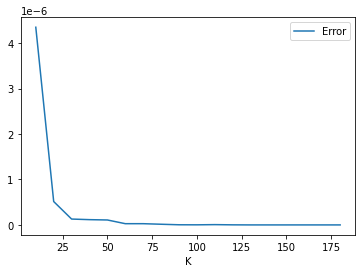

<Figure size 432x288 with 0 Axes>

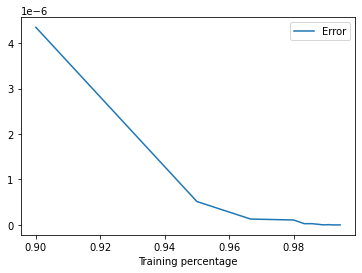

<Figure size 432x288 with 0 Axes>

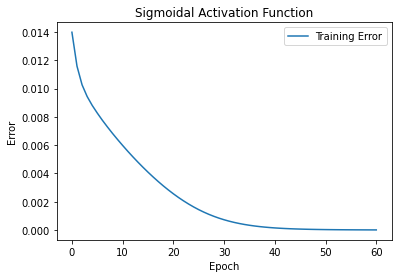

In [32]:
#SIGMOIDAL
neuralNetworkManager = NeuralNetworkManager(architecture,SigmoidalActivationFunction.getType(beta),learningRate,maxEpochs,maxToleranceExponent)
#Normalize
(resultsSetNormalized,fixnt)=normalize(resultsSet,0,1)
#Training
(epochs,executionTime,exception) = neuralNetworkManager.start(trainingSet,resultsSetNormalized)
print("----------------------FINISH TRAINING----------------------------------------------------")
configHelper.activationFunctionType = HyperbolicTangentActivationFunction(beta).name
output = Output(configHelper,epochs[-1].error,epochs[-1].epochNumber,executionTime)
output.printOutput()
#Testing
print("----------------------EVALUATE GENERALITAZTION----------------------------------------------------")
errors = []
kArray = []
trainingPercentages = []
for k in range(1,int(len(trainingSet)/10) - 1):
    k = k*10
    kArray.append(k)
    (error,trainingPercentage,maxAccuracy) = neuralNetworkManager.crossValidation(trainingSet,resultsSetNormalized,k)
    errors.append(error)
    trainingPercentages.append(trainingPercentage)
plotErrorAgainstKGraph(errors,kArray) 
plotErrorAgainstTrainingPercentageGraph(errors,trainingPercentages)
plotEpochsError(epochs,"Sigmoidal Activation Function")

# Ej3 Perceptron Multicapa

##### 3.1 Funciones logicas ’Y’ y ’O exclusivo’ con entradas

##### ’Y’

In [ ]:
import random
import numpy as np
random.seed(11)
np.random.seed(11)
configPath="./config/Ej3/3_1/configEj3_1.json"
configHelper = ConfigHelper(configPath)
(architecture,activationFunction,beta,learningRate,maxEpochs,maxToleranceExponent,randomSeed) = configHelper.getProperties()
(trainingSet,resultsSet)=readSetFiles("./datasets/Ej1/training_set_ej_1.txt","./datasets/Ej1/result_set_ej_1_and.txt")

#Seteo de seed
np.random.seed(randomSeed)
random.seed(randomSeed)

neuralNetworkManager = NeuralNetworkManager(architecture,activationFunction,learningRate,maxEpochs,maxToleranceExponent)
(epochs,executionTime,exception) = neuralNetworkManager.start(trainingSet,resultsSet)
#Plot error graph
plotEpochsError(epochs)
#Print output
print("FINISH-------------------------------------------------------------------------------------------")
output = Output(configHelper,epochs[-1].error,epochs[-1].epochNumber,executionTime)
output.printOutput()

##### ’O exclusivo’

In [ ]:
configPath="./config/Ej3/3_1/configEj3_1.json"
configHelper = ConfigHelper(configPath)
(architecture,activationFunction,beta,learningRate,maxEpochs,maxToleranceExponent,randomSeed) = configHelper.getProperties()
(trainingSet,resultsSet)=readSetFiles("./datasets/Ej1/training_set_ej_1.txt","./datasets/Ej1/result_set_ej_1_and.txt")

#Seteo de seed
np.random.seed(randomSeed)
random.seed(randomSeed)

neuralNetworkManager = NeuralNetworkManager(architecture,activationFunction,learningRate,maxEpochs,maxToleranceExponent)
(epochs,executionTime,exception) = neuralNetworkManager.start(trainingSet,resultsSet)
#Plot error graph
plotEpochsError(epochs)
#Print output
print("FINISH-------------------------------------------------------------------------------------------")
output = Output(configHelper,epochs[-1].error,epochs[-1].epochNumber,executionTime)
output.printOutput()

##### 3.2 Indicar paridad para numeros del 0 al 9

In [ ]:
configPath="./config/Ej3/3_2/configEj3_2.json"
configHelper = ConfigHelper(configPath)
(architecture,activationFunction,beta,learningRate,maxEpochs,maxToleranceExponent,randomSeed) = configHelper.getProperties()
(trainingSet,resultsSet)=readNumberSetFiles("./datasets/Ej3/training_set_ej_3.txt","./datasets/Ej3/result_set_ej_3_2.txt")

#Seteo de seed
np.random.seed(randomSeed)
random.seed(randomSeed)

In [ ]:
#TANH

#Creamos la instancia para metricas
classes = [1,-1]
metrics = Metrics(classes,False,-1,1)

#Training
neuralNetworkManager = NeuralNetworkManager(architecture,HyperbolicTangentActivationFunction.getType(beta),learningRate,maxEpochs,maxToleranceExponent)
(epochs,executionTime,exception) = neuralNetworkManager.start(trainingSet,resultsSet)
print("FINISH-------------------------------------------------------------------------------------------")
configHelper.activationFunctionType = HyperbolicTangentActivationFunction.getType(beta).name
output = Output(configHelper,epochs[-1].error,epochs[-1].epochNumber,executionTime)
output.printOutput()
print("----------------------EVALUATE GENERALITAZTION----------------------------------------------------")
errors = []
kArray = []
trainingPercentages = []
accuracyArray = []
for k in range(2,len(trainingSet)+1):
    kArray.append(k)
    (error,trainingPercentage,maxAccuracy) = neuralNetworkManager.crossValidation(trainingSet,resultsSet,k,copy.deepcopy(metrics))
    errors.append(error)
    trainingPercentages.append(trainingPercentage)
    accuracyArray.append(maxAccuracy)
plotMetricAgainstVariable(accuracyArray,"Accuracy",kArray,"K")
plotMetricAgainstVariable(accuracyArray,"Accuracy",trainingPercentages,"Training percentage")


In [ ]:
#SIGMOIDAL

#Creamos la instancia para metricas
classes = [0,1]
metrics = Metrics(classes,False,0,1)

#Normalize
(resultsSetNormalized,fixnt)=normalize(resultsSet,0,1)

#Training
neuralNetworkManager = NeuralNetworkManager(architecture,SigmoidalActivationFunction.getType(beta),learningRate,maxEpochs,maxToleranceExponent)
(epochs,executionTime,exception) = neuralNetworkManager.start(trainingSet,resultsSetNormalized)
print("FINISH-------------------------------------------------------------------------------------------")
configHelper.activationFunctionType=SigmoidalActivationFunction.getType(beta).name
output = Output(configHelper,epochs[-1].error,epochs[-1].epochNumber,executionTime)
output.printOutput()
print("----------------------EVALUATE GENERALITAZTION----------------------------------------------------")
errors = []
kArray = []
trainingPercentages = []
accuracyArray = []
for k in range(2,len(trainingSet)+1):
    kArray.append(k)
    (error,trainingPercentage,maxAccuracy) = neuralNetworkManager.crossValidation(trainingSet,resultsSetNormalized,k,copy.deepcopy(metrics))
    errors.append(error)
    trainingPercentages.append(trainingPercentage)
    accuracyArray.append(maxAccuracy)
plotMetricAgainstVariable(accuracyArray,"Accuracy",kArray,"K")
plotMetricAgainstVariable(accuracyArray,"Accuracy",trainingPercentages,"Training percentage")

##### 3.3 Indicar que numero es, para numeros del 0 al 9

In [ ]:
configPath="./config/Ej3/3_3/configEj3_3.json"
configHelper = ConfigHelper(configPath)
(architecture,activationFunction,beta,learningRate,maxEpochs,maxToleranceExponent,randomSeed) = configHelper.getProperties()
(trainingSet,resultsSet)=readNumberSetFiles("./datasets/Ej3/training_set_ej_3.txt","./datasets/Ej3/result_set_ej_3_3.txt")

#Seteo de seed
np.random.seed(randomSeed)
random.seed(randomSeed)

In [ ]:
#TANH
classes = [0,1,2,3,4,5,6,7,8,9]
metrics = Metrics(classes,True,-1,1)

#Normalize
(resultsSetNormalized,fixnt)=normalize(resultsSet,-1,1)

neuralNetworkManager = NeuralNetworkManager(architecture,HyperbolicTangentActivationFunction.getType(beta),learningRate,maxEpochs,maxToleranceExponent)
(epochs,executionTime,exception) = neuralNetworkManager.start(trainingSet,resultsSetNormalized)
configHelper.activationFunctionType = HyperbolicTangentActivationFunction.getType(beta).name
print("FINISH-------------------------------------------------------------------------------------------")
output = Output(configHelper,epochs[-1].error,epochs[-1].epochNumber,executionTime)
output.printOutput()

In [ ]:
#SIGMOIDAL
classes = [0,1,2,3,4,5,6,7,8,9]
metrics = Metrics(classes,True,0,1)


neuralNetworkManager = NeuralNetworkManager(architecture,SigmoidalActivationFunction.getType(beta),learningRate,maxEpochs,maxToleranceExponent)
(epochs,executionTime,exception) = neuralNetworkManager.start(trainingSet,resultsSet)
configHelper.activationFunctionType = SigmoidalActivationFunction.getType(beta).name
print("FINISH-------------------------------------------------------------------------------------------")
output = Output(configHelper,epochs[-1].error,epochs[-1].epochNumber,executionTime)
output.printOutput()

##### Agregar ruido

In [ ]:


errorsNoise=[]

for epoch in epochs:
    (errorWNoise,aux,aux2,aux3)= neuralNetworkManager.test(createTrainingSetWithNoise(trainingSet,0.02),resultsSet,layers=epoch.layers)
    errorsNoise.append(errorWNoise)
print(errorsNoise)
plotEpochsError(epochs,testingSetErrors=errorsNoise)



##### Hacer grafico de error de testeo en funcion de la probabilidad de ruido

In [ ]:
errorsNoise=[]
currentProbability = 0.02
limitProbability = 0.1
step = 0.02
probabilities=[]

while(currentProbability<=limitProbability):
    (errorWNoise,aux,aux2,aux3)= neuralNetworkManager.test(createTrainingSetWithNoise(trainingSet,0.02),resultsSet)
    errorsNoise.append(errorWNoise)
    probabilities.append(currentProbability)
    currentProbability+=step

plotProbabilityTestingError(probabilities,"Testing error vs probability",errorsNoise)

# for probability in p:
#     (errorWNoise,aux,aux2,aux3)= neuralNetworkManager.test(createTrainingSetWithNoise(trainingSet,0.02),resultsSet,layers=epoch.layers)
#     errorsNoise.append(errorWNoise)
# print(errorsNoise)
# plotEpochsError(epochs,testingSetErrors=errorsNoise